In [43]:
#引入包
# import librosa
# import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

<IPython.core.display.Javascript object>


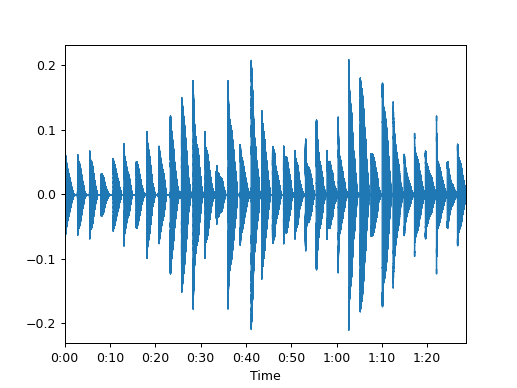

22050


In [44]:
import librosa
import librosa.display
whole,sr = librosa.load("高音键笙1-36.wav");
%matplotlib notebook
plt.figure(1);
librosa.display.waveplot(whole,sr) #画出图像
ipd.Audio('高音键笙1-36.wav') #播放音频
print(sr) #采样率

In [46]:
frame_length = 10000; #分窗大小
hop_length = 512; #傅里叶变换长度
rms = librosa.feature.rms(y=whole,frame_length = frame_length,hop_length=hop_length).T #计算音频的平均能量值
t1=np.arange(whole.size)/sr
t2=np.arange(rms.shape[0])*hop_length/sr


intervals=np.empty(shape=[0,2])
i0=-1  #起始点初始值
i1=-1  #结束点初始值
lim=max(rms)/10#设能量阈值为平均能量的最大值的1/5
#计算端点
for i in range(rms.shape[0]):
    if i0<0: #查找起始点
        if rms[i]>lim: #如果分窗的平均能量大于阈值
            i0=i*hop_length/sr #从这一分窗开始记入人声片段
    else:  #查找结束点
        if rms[i]<lim: #如果分窗的平均能量小于阈值
            i1=i*hop_length/sr #从这一分窗开始不计入人声片段
            intervals=np.append(intervals,[[i0,i1]],axis=0) #记录起始点和结束点位置
            i0=-1#重设起始点
librosa.output.annotation('edges.csv',intervals) #将端点信息以csv格式保存


<IPython.core.display.Javascript object>


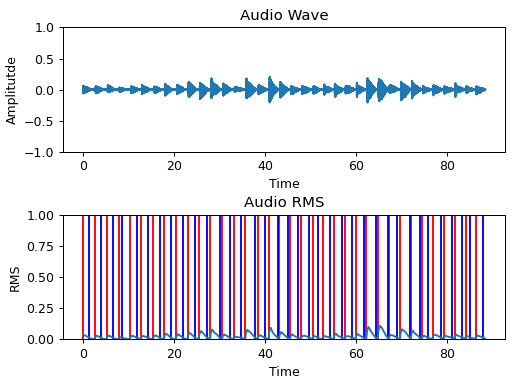

In [47]:
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, whole) #总音频图像
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
li2, = ax[1].plot(t2, rms) #分段结果
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red') #用红色辅助线标出人声起始点
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue') #用蓝色辅助线标出人声结束点
ax[1].set(title='Audio RMS',xlabel='Time',ylabel='RMS',ylim=(0,1))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


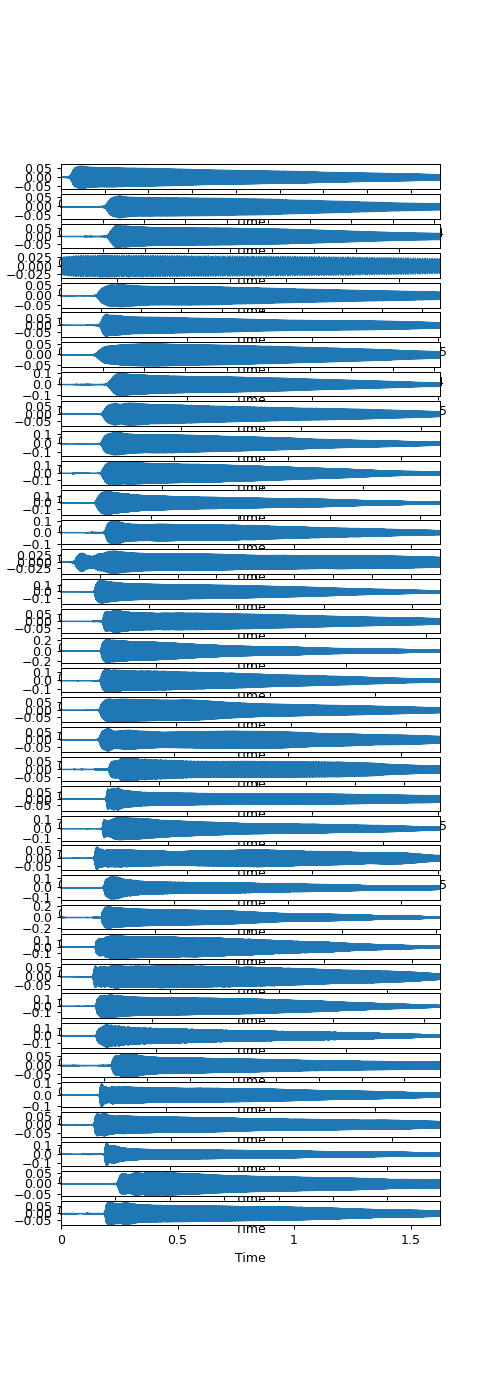

In [48]:
import wave
import os
#将人声片段分段显示
plt.figure(3)
for i in range(36):
    start = int(intervals[i][0]*sr); #计算起始点位置
    end = int(intervals[i][1]*sr); #计算结束点位置
    part = whole[start:end]; #截取人声片段
    librosa.output.write_wav('./高音键笙 音源/'+str(i)+'.wav', part, sr,norm=False)
    plt.subplot(36,1,i+1)
    librosa.display.waveplot(part,sr) #画出图像


In [6]:
ipd.Audio(part,rate=sr)

In [15]:
start = int(intervals[35][0]*sr); #计算起始点位置
end = int(intervals[35][1]*sr); #计算结束点位置
part = whole[start:end]
# librosa.output.write_wav('./高音键笙 音源/ '+str(35)+'.wav', part, sr,norm=False)
ipd.Audio(part,rate=sr)

In [16]:
f = wave.open("35.wav","wb")
#set wav params
f.setnchannels(1)
f.setsampwidth(1)
f.setframerate(44100)
#turn the data to string
f.writeframes(part.tobytes())
f.close()

In [1]:
#引入包
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy import interpolate

<IPython.core.display.Javascript object>


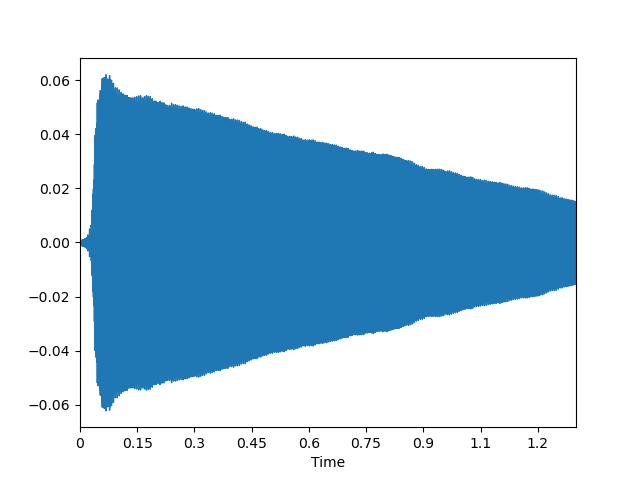

22050


In [4]:





whole,sr = librosa.load("0.wav");
%matplotlib notebook
plt.figure(1);
librosa.display.waveplot(whole,sr) #画出图像
ipd.Audio('0.wav') #播放音频
print(sr) #采样率

In [5]:
frame_length = 300; #分窗大小
hop_length = 80; #傅里叶变换长度
rms = librosa.feature.rms(y=whole,frame_length = frame_length,hop_length=hop_length).T #计算音频的平均能量值
# rms = rms.T
# plt.figure(2)
# plt.show(2)
t1=np.arange(whole.size)/sr
t2=np.arange(rms.shape[0])*hop_length/sr

<IPython.core.display.Javascript object>


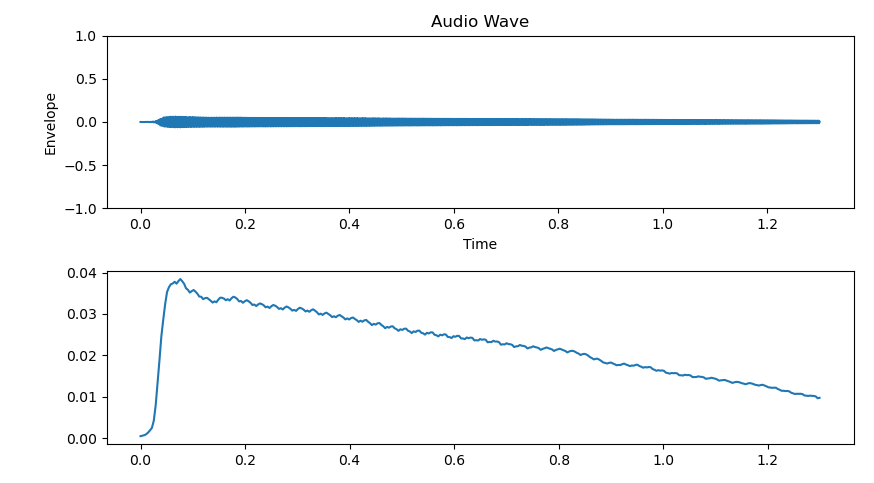

In [6]:
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, whole) #总音频图像
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
li2, = ax[1].plot(t2, rms) #振幅包络
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Envelope',ylim=(-1,1)) 
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


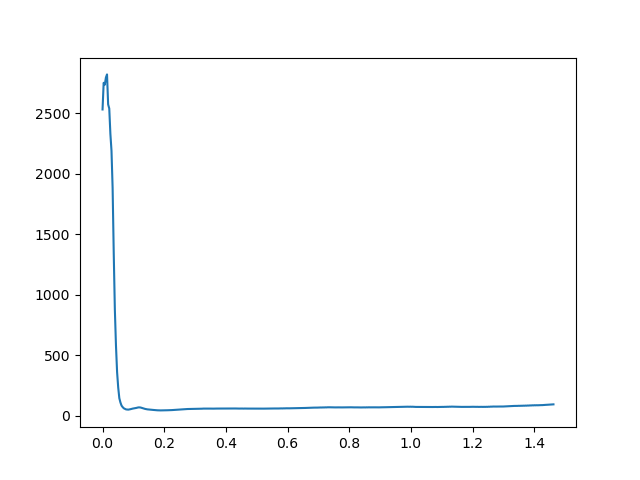

In [22]:
d = np.ones(len(rms))
rms = rms.reshape(len(rms))
t3 =d/rms
plt.figure(4)
# plt.plot(t2,rms)
plt.plot(t2,t3)
# plt.plot(normalization(rms))
# plt.plot(normalization(t3))

In [96]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 

In [23]:
from scipy import interpolate
f = interpolate.interp1d(t2,rms)
dnew = t1
ynew = f(dnew)
plt.figure(5)
plt.plot(t1,ynew)
plt.plot(t2,rms)

ValueError: A value in x_new is above the interpolation range.

In [83]:
ynew.shape

(28672,)

In [6]:
whole.shape

(32256,)

In [9]:
rms.shape

(16129, 1)

In [74]:
rms = rms.reshape(len(rms))

<IPython.core.display.Javascript object>


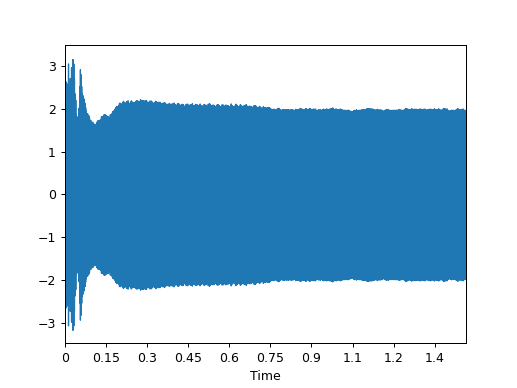

In [77]:
fin = whole/ynew
plt.figure(6)
librosa.display.waveplot(fin,sr)

In [78]:
ipd.Audio(fin,rate=sr)

In [79]:
ipd.Audio(whole,rate=sr)

In [81]:
#引入包
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy import interpolate







def de_env(whole,sr):
    frame_length = 1000; #分窗大小
    hop_length = 2; #傅里叶变换长度
    rms = librosa.feature.rms(y=whole,frame_length = frame_length,hop_length=hop_length).T #计算音频的平均能量值
    t1=np.arange(whole.size)/sr #原始数据长度
    t2=np.arange(rms.shape[0])*hop_length/sr #振幅包络长度
#     #画图
#     f,ax = plt.subplots(2)
#     li1, = ax[0].plot(t1, whole) #总音频图像
#     ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
#     li2, = ax[1].plot(t2, rms) #振幅包络
#     ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Envelope',ylim=(-1,1)) 
#     plt.tight_layout()
#     plt.show()
    d = np.ones(len(rms))
    rms = rms.reshape(len(rms))
    t3 =d/rms #振幅包络倒数
#     #画图
#     plt.figure(4)
#     plt.plot(t2,t3)
    #插值
    f = interpolate.interp1d(t2,t3)
    dnew = t1
    ynew = f(dnew)
#     #画图
#     plt.figure(5)
#     plt.plot(t1,ynew)
#     plt.plot(t2,t3)
    fin = whole*ynew #合成
#     plt.figure(6)
#     librosa.display.waveplot(fin,sr)
    return fin

for i in range(36):
    whole,sr = librosa.load('./高音键笙 音源/'+str(i)+'.wav')
    fin = de_env(whole,sr)
    librosa.output.write_wav('./高音键笙 音源去包络/'+str(i)+'.wav', fin, sr,norm=False)





In [14]:
t1

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.46272109e+00, 1.46276644e+00, 1.46281179e+00])

In [15]:
t2

array([0.00000000e+00, 9.07029478e-05, 1.81405896e-04, ...,
       1.46267574e+00, 1.46276644e+00, 1.46285714e+00])